# Scikit-Learn

#### Way Scikit-Learn works

**General Overview** :- 
Data --> model --> predictions 

Data is split into two parts X (the training Data) , y(the required predictions) . We desgin the model in such a way that the model can predict `y` using `X` most precisely .

We can say that there are two Phases :
1. Creating the model <--- just Python Objects
2. Learning from the Data  <---- Often called .fit(X,y) step
 


In [1]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

In [2]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = KNeighborsRegressor().fit(X,y)
pipe = Pipeline([
    ("scale" , StandardScaler()),
    ("model" , KNeighborsRegressor(n_neighbors=5))
])
# pipe.get_params()

In [3]:
pipe.fit(X,y)
pred = pipe.predict(X)

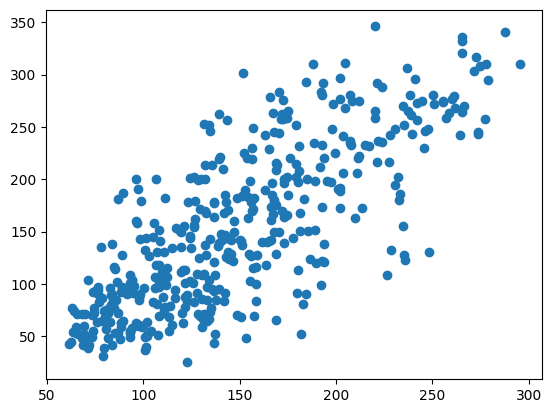

In [4]:
plt.scatter(pred ,y)

### Way kNeighborsRegressor() works
The model starts looking for its nearest neighbour , the predictions for any point will be equal to the average of the nearest neighbours found 

In [5]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

mod = GridSearchCV(estimator= pipe,
             param_grid={'model__n_neighbors' : [1,2,3,4,5,6,7,8,9,10]},
             cv=3)

In [6]:
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004093,0.001652,0.003911,0.001778,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,10
1,0.002109,0.000426,0.003050,0.001270,2,{'model__n_neighbors': 2},0.268889,0.339379,0.264563,0.290944,0.034295,9
2,0.001536,0.000115,0.002115,0.000039,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,8
3,0.001410,0.000096,0.002112,0.000211,4,{'model__n_neighbors': 4},0.342407,0.404701,0.409910,0.385673,0.030668,6
4,0.001404,0.000188,0.002106,0.000282,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,7
5,0.001434,0.000064,0.002154,0.000112,6,{'model__n_neighbors': 6},0.372665,0.389923,0.436389,0.399659,0.026911,5
6,0.001617,0.000286,0.002147,0.000289,7,{'model__n_neighbors': 7},0.412584,0.393681,0.446147,0.417471,0.021696,4
7,0.001855,0.000498,0.002175,0.000182,8,{'model__n_neighbors': 8},0.414478,0.409779,0.485850,0.436702,0.034806,3
8,0.001357,0.000068,0.002636,0.000533,9,{'model__n_neighbors': 9},0.414191,0.412035,0.528462,0.451563,0.054383,2
9,0.001206,0.000140,0.001917,0.000329,10,{'model__n_neighbors': 10},0.408989,0.405303,0.544371,0.452888,0.064706,1


In [7]:
# print(load_diabetes()['DESCR'])

## Preprocessing (Transforming Data)

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt

# df = pd.read_csv("drawndata1.csv")


### Using Standard Scaler

* **What it does:** rescales the data so it has mean(average) of 0 and SD (standard Deviation) of 1.

* **The problem it solves:** It's for algorithms that are `distance-based` (like KNN or SVM's). It prevents one feature from overpowering another feature just because it's numbers are much bigger.

* **What it Dosen't do:** It does not change the shape of your data. If your data is `clumped up` (skewed), it will still be clumped up after using StandardScaler, just with a new scale.

### Using Quantile Transformer 
This method transforms the feature to follow a uniform or a normal distribution . Therefore , for a given feature , this transformation tends to spread out the most frequent values . It also reduces the imapct of (marginal) outliers .

What is Quantile Transformation ? 

**Ans:** It's a data preperation technique
1. Takes a column of "clumpy" or strangely-shaped data.
2. Ranks all the data points from smallest to largest(this is the "quantile" part).
3. Forces them into a new, "ideal" shape-almost always a perfect bell curve(Normal Distribution).


**Note:** This is a robust preprocessing scheme 

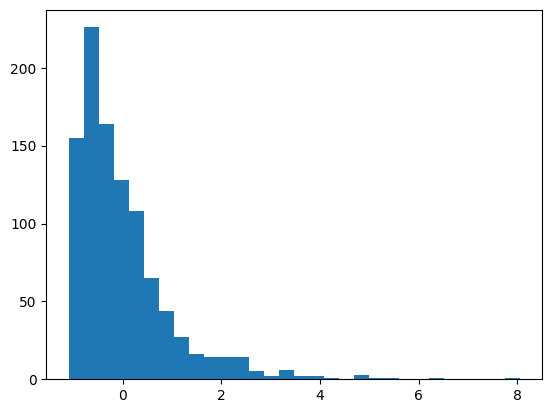

In [9]:
x = np.random.exponential(10 , (1000))+np.random.normal(0,1,(1000))
plt.hist((x-np.mean(x))/np.std(x) , 30);

In [10]:
arr = np.array(["Low" ,"Low","high" , "medium"]).reshape(-1 , 1)
arr

array([['Low'],
       ['Low'],
       ['high'],
       ['medium']], dtype='<U6')

In [11]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
enc.fit_transform(arr)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])